In [1]:
# Import all required modules and function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


%matplotlib inline


In [2]:
# Reading the data from train_0OECtn8.csv file and spliting it into input and output 
data_set = pd.read_csv('train_0OECtn8.csv')
# data_set.head()

# selecting independent attributes from data, excluding rowid,userid and dependent variable 
input_x=data_set.iloc[:,2:-1]

# selecting dependent variable as output 
output_y=data_set.iloc[:,-1]

input_x.head(5)


,category_id,video_id,age,gender,profession,followers,views
0,37,128,24,Male,Student,180,1000
1,32,132,14,Female,Student,330,714
2,12,24,19,Male,Student,180,138
3,23,112,19,Male,Student,220,613
4,23,112,27,Male,Working Professional,220,613


In [3]:
# Reading data from test file for later testing 

test_data_df = pd.read_csv('test_1zqHu22.csv')
test_data_set = test_data_df.iloc[:,2:]
# test_data_set.drop('video_id',axis=1,inplace=True)
test_data_set.head()

,category_id,video_id,age,gender,profession,followers,views
0,12,42,14,Male,Student,180,138
1,34,115,14,Male,Student,230,840
2,8,110,44,Female,Working Professional,280,628
3,16,137,18,Male,Student,270,462
4,34,96,47,Female,Other,230,840


In [4]:
# Encoding the category data of profession and gender
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Profession encoding
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
input_x= np.array(column_transformer.fit_transform(input_x),dtype = np.str)
test_data_set = np.array(column_transformer.fit_transform(test_data_set),dtype =  np.str)

# Gender encoding
column_transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
input_x= np.array(column_transformer.fit_transform(input_x),dtype = np.str)
test_data_set= np.array(column_transformer.fit_transform(test_data_set),dtype = np.str)

# Converting string array into float
input_x = input_x.astype(np.float)
test_data_set = test_data_set.astype(np.float)

print(input_x[:5])
print('\ntest data for solution: \n',test_data_set[:5])

[[   0.    1.    0.    1.    0.   37.  128.   24.  180. 1000.]
 [   1.    0.    0.    1.    0.   32.  132.   14.  330.  714.]
 [   0.    1.    0.    1.    0.   12.   24.   19.  180.  138.]
 [   0.    1.    0.    1.    0.   23.  112.   19.  220.  613.]
 [   0.    1.    0.    0.    1.   23.  112.   27.  220.  613.]]

test data for solution: 
 [[  0.   1.   0.   1.   0.  12.  42.  14. 180. 138.]
 [  0.   1.   0.   1.   0.  34. 115.  14. 230. 840.]
 [  1.   0.   0.   0.   1.   8. 110.  44. 280. 628.]
 [  0.   1.   0.   1.   0.  16. 137.  18. 270. 462.]
 [  1.   0.   1.   0.   0.  34.  96.  47. 230. 840.]]


In [5]:
# spliting the data into train and test 
input_train, input_test, output_train, output_test =  train_test_split(input_x,output_y,test_size=0.05)

In [6]:
# selecting the simple linear regression model 
model = LinearRegression()

# fitting the train data to the model
model.fit(input_train,output_train)

LinearRegression()

In [7]:
# Predicting the Test set results
predicted_output = model.predict(input_test)

# to show max 2 digits after decimal
np.set_printoptions(precision=2)

predicted_output =  np.around(predicted_output, decimals = 2)
# print(predicted_output[:10],'\n')

# changing 'actual output' series to a ndarray
output_test=output_test.to_numpy(dtype ='float64')

# comparision between  predicted output(left) and actual output(right)
print(np.concatenate((predicted_output.reshape(len(predicted_output),1),output_test.reshape(len(output_test),1)),axis=1)[:10][:])


[[4.13 3.93]
 [3.29 3.7 ]
 [4.02 3.17]
 [3.3  3.63]
 [2.59 2.32]
 [3.68 3.4 ]
 [4.1  3.93]
 [4.15 4.25]
 [4.04 3.83]
 [3.91 3.9 ]]


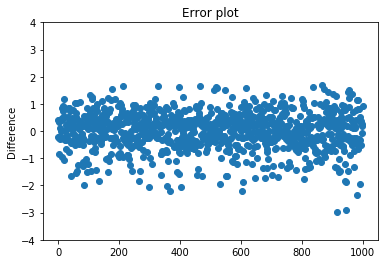

In [8]:
# ploting the error difference for 1000 points (points on Y= 0 has no error)
plt.plot(output_test[:1000] - predicted_output[:1000] ,marker='o',linestyle='')
plt.ylim(-4,4)
plt.ylabel('Difference')
plt.title('Error plot')
plt.show()

In [9]:
# R2 scoring for the model with known test data
from sklearn.metrics import r2_score
r2_score(output_test, predicted_output)

0.2833176754379977

In [10]:
# Using Random forest regression algorithm
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=150,min_samples_split = 60,random_state = 10)
regressor.fit(input_train, output_train) 

RandomForestRegressor(min_samples_split=60, n_estimators=150, random_state=10)

In [11]:
predicted_output_random =  regressor.predict(input_test)

In [12]:
r2_score(output_test, predicted_output_random)

0.3518994774248606

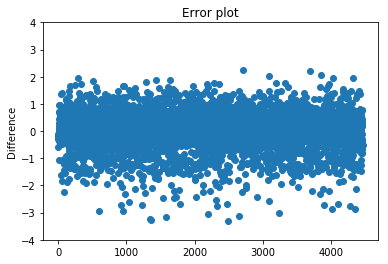

In [13]:
# ploting the error difference for 1000 points (points on Y= 0 has no error)
plt.plot(output_test[:10000] - predicted_output_random[:10000] ,marker='o',linestyle='')
plt.ylim(-4,4)
plt.ylabel('Difference')
plt.title('Error plot')
plt.show()

In [14]:
# As the Random Forest model gave better R2 score will use it for final solution
# Predicting the test file using built model
final_test_predicted = regressor.predict(test_data_set)
final_test_predicted = np.around(final_test_predicted, decimals = 2)

In [15]:
# Creation of solution_rondom_forest.csv using row_ids and predicted values for upload 
# # long method of creation of solution file
# row_ids = test_data_df.iloc[:,0]
# final_test_predicted =final_test_predicted.flatten()
# final_test_predicted = pd.Series(final_test_predicted, name = 'engagement_score' )
# solution = pd.concat([row_ids,final_test_predicted],axis =1)
# solution.to_csv('solution_rondom_forest.csv',index = False)



In [16]:
# Easy method of creating solution file
test_data_df['engagement_score'] = final_test_predicted
test_data_df[['row_id','engagement_score']].to_csv('solution_rondom_forest.csv',index=False)